In [224]:
# This is a good example of how to use Ramdom Forest classification with data in SQL Server table using the popular Iris data.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import pyodbc
from sklearn.ensemble import RandomForestClassifier

# STEP 1: get your data from SQL Server and assign it to a pandas variable
conn_str = pyodbc.connect('Driver={SQL Server};' 'Server=LAPTOP-CHKIB79A;''Database=Tutorial;''Trusted_Connection=yes;')
query_str = "SELECT  [sepal_length_cm],[sepal_width_cm],[petal_length_cm],[petal_width_cm],[target] ,[Flower_Name] FROM [Tutorial].[dbo].[IrisData]"
df = pd.read_sql(sql=query_str, con=conn_str)
df.head()


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target,Flower_Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## There are 3 types of Iris flowers namely Setosa,versicolor and virginica. The 4 factors that will determine the type of Iris flowers are : Sepal length, Sepal Width, Petal length and Petal Width.

In [225]:
# Let's get the independent variables and assign it to x.
x = df.drop(['target','Flower_Name'], axis = 'columns')
x.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [226]:
# Let's get our dependent variable y
y = df.target # target correspond to integer values for Flower_Name
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [227]:
# Let's do some analysis of Iris flower.
# Assign all Setosa flower to variable df0. This is equivalent to an sql WHERE clause statement; selecting * where target = 0
df0 = df[df.target==0] # Equivalent to where clause in sql.
df0.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target,Flower_Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [228]:
# Assign all versicolor flower to variable df0.
df1 = df[df.target==1]
df1.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target,Flower_Name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [229]:
# Assign all virginica flower to variable df0.
df2 = df[df.target==2]
df2.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target,Flower_Name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


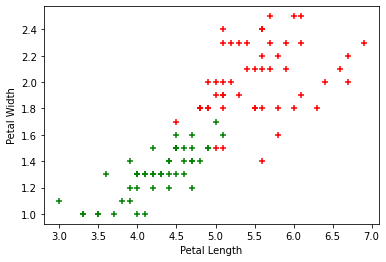

In [230]:
# let us use a scatter plot to have a view of Petal length and width of versicolor and virginica.
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df1['petal_length_cm'], df1['petal_width_cm'],color="green",marker='+')
plt.scatter(df2['petal_length_cm'], df2['petal_width_cm'],color="red",marker='+')

In [231]:
# Let's train our model

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) 
len(x_train)

105

In [232]:
# Let's fit our model
model = RandomForestClassifier(10) # get RandomForestClassifier class.

In [233]:
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [234]:
# let's make some prediction and check accuracy of the model

y_predict = model.predict(x_test)
print("The predictions are :",y_predict)

r2 = model.score(x_test,y_test)
print("The accuracy of the model n_estimators of 10 is :" ,r2)

The predictions are : [2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
The accuracy of the model n_estimators of 10 is : 0.9555555555555556


In [235]:
# Now, let's see if we can tune our model parameter to get better result
# Let's try n_estimators=30  

model30 = RandomForestClassifier(n_estimators=30) # Let's get estimators of 30.
model30.fit(x_train, y_train)
r3 = model30.score(x_test,y_test)
print("The accuracy of the model n_estimators of 30 is :" ,r3)

The accuracy of the model n_estimators of 30 is : 0.9777777777777777


In [236]:
# Let's try n_estimators=40  

model40 = RandomForestClassifier(n_estimators=40) # Let's get estimators of 40.
model40.fit(x_train, y_train)
r4 = model40.score(x_test,y_test)
print("The accuracy of the model n_estimators of 40 is :" ,r4)

The accuracy of the model n_estimators of 40 is : 0.9777777777777777


In [237]:
# Let's try n_estimators=50  

model50 = RandomForestClassifier(n_estimators=50) # Let's get estimators of 50.
model50.fit(x_train, y_train)
r5 = model50.score(x_test,y_test)
print("The accuracy of the model n_estimators of 50 is :" ,r5)

The accuracy of the model n_estimators of 50 is : 0.9777777777777777


### From the various parameters values of n_estimators above, it looks like 97.7% is the best accuracy we can get despite changing the value of n_estimators. This matched the best value we got for Support Vector Machine Algorithm. 